In [509]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [510]:
input_data = {
    'DATE': ['01-07-2023', '02-07-2023', '03-07-2023', '04-07-2023', '05-07-2023', '06-07-2023', '07-07-2023', '08-07-2023', '09-07-2023', '10-07-2023', '11-07-2023', '12-07-2023', '13-07-2023', '14-07-2023', '15-07-2023', '16-07-2023', '17-07-2023', '18-07-2023', '19-07-2023', '20-07-2023', '21-07-2023'],
    'ITEM_NO': [11101, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119, 11120, 11121],
    'ITEM_NAME': ['Apple 14 Pro Max', 'Vivo 15 Plus', 'Apple 13 Pro Max', 'Oppo Reno 10 Series', 'samsung S23', 'Realme C52', 'OnePlus Nord 3', 'Apple 11 Pro Max', 'Apple 12 Pro Max', 'Apple 14 Plus', 'Apple 13 Plus', 'Apple 12 Plus', 'samsung S22', 'samsung S21', 'OnePlus Nord 2', 'Realme C50', 'Realme C51', 'Oppo Reno 9 Series', 'Oppo Reno 8 Series', 'Oppo Reno 7 Series', 'Oppo Reno 6 Series'],
    'STOCK': [5, 10, 4, 4, 12, 14, 8, 10, 10, 20, 15, 15, 30, 28, 19, 16, 22, 25, 14, 18, 12],
    'SALE': [1, 8, 0, 1, 9, 11, 6, 5, 4, 16, 12, 10, 18, 13, 9, 6, 4, 8, 7, 3, 5]
}

data = pd.DataFrame(input_data)

In [511]:
data

,DATE,ITEM_NO,ITEM_NAME,STOCK,SALE
0,01-07-2023,11101,Apple 14 Pro Max,5,1
1,02-07-2023,11102,Vivo 15 Plus,10,8
2,03-07-2023,11103,Apple 13 Pro Max,4,0
3,04-07-2023,11104,Oppo Reno 10 Series,4,1
4,05-07-2023,11105,samsung S23,12,9
5,06-07-2023,11106,Realme C52,14,11
6,07-07-2023,11107,OnePlus Nord 3,8,6
7,08-07-2023,11108,Apple 11 Pro Max,10,5
8,09-07-2023,11109,Apple 12 Pro Max,10,4
9,10-07-2023,11110,Apple 14 Plus,20,16


In [512]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

data['DAY'] = data['DATE'].dt.day
data['MONTH'] = data['DATE'].dt.month
data['YEAR'] = data['DATE'].dt.year

In [513]:
# Drop 'DATE' column
data.drop('DATE', axis=1, inplace=True)

In [514]:
# Reorder columns
data = data[['DAY', 'MONTH', 'YEAR', 'STOCK', 'ITEM_NAME', 'SALE']]

In [515]:
data

,DAY,MONTH,YEAR,STOCK,ITEM_NAME,SALE
0,1,7,2023,5,Apple 14 Pro Max,1
1,2,7,2023,10,Vivo 15 Plus,8
2,3,7,2023,4,Apple 13 Pro Max,0
3,4,7,2023,4,Oppo Reno 10 Series,1
4,5,7,2023,12,samsung S23,9
5,6,7,2023,14,Realme C52,11
6,7,7,2023,8,OnePlus Nord 3,6
7,8,7,2023,10,Apple 11 Pro Max,5
8,9,7,2023,10,Apple 12 Pro Max,4
9,10,7,2023,20,Apple 14 Plus,16


In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DAY        21 non-null     int64 
 1   MONTH      21 non-null     int64 
 2   YEAR       21 non-null     int64 
 3   STOCK      21 non-null     int64 
 4   ITEM_NAME  21 non-null     object
 5   SALE       21 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [517]:
data['AVAILABLE_QUANTITY'] = data['STOCK'] - data['SALE']

data

,DAY,MONTH,YEAR,STOCK,ITEM_NAME,SALE,AVAILABLE_QUANTITY
0,1,7,2023,5,Apple 14 Pro Max,1,4
1,2,7,2023,10,Vivo 15 Plus,8,2
2,3,7,2023,4,Apple 13 Pro Max,0,4
3,4,7,2023,4,Oppo Reno 10 Series,1,3
4,5,7,2023,12,samsung S23,9,3
5,6,7,2023,14,Realme C52,11,3
6,7,7,2023,8,OnePlus Nord 3,6,2
7,8,7,2023,10,Apple 11 Pro Max,5,5
8,9,7,2023,10,Apple 12 Pro Max,4,6
9,10,7,2023,20,Apple 14 Plus,16,4


# Final Result

In [518]:
data.corr()['SALE']

DAY                   0.173228
MONTH                      NaN
YEAR                       NaN
STOCK                 0.709887
SALE                  1.000000
AVAILABLE_QUANTITY    0.081559
Name: SALE, dtype: float64

### Calculating Available Quantity

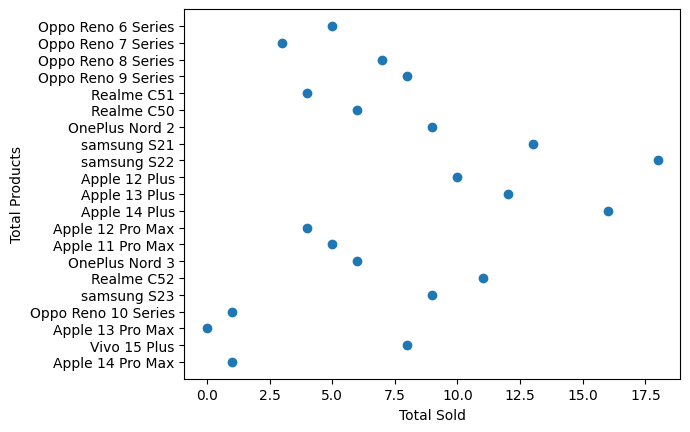

In [519]:
import matplotlib.pyplot as plt

plt.scatter(data['SALE'], data['ITEM_NAME'])
plt.xlabel('Total Sold')
plt.ylabel('Total Products')
plt.show()

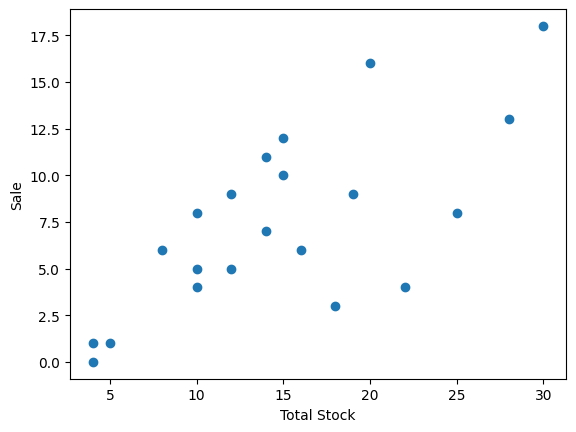

In [520]:
import matplotlib.pyplot as plt

plt.scatter(data['STOCK'], data['SALE'])
plt.xlabel('Total Stock')
plt.ylabel('Sale')
plt.show()

In [521]:
# Convert 'ITEM_NAME' into one-hot encoded features

data_encoded = pd.get_dummies(data[['DAY', 'MONTH', 'YEAR', 'AVAILABLE_QUANTITY', 'ITEM_NAME']], drop_first=True)

data_encoded

,DAY,MONTH,YEAR,AVAILABLE_QUANTITY,ITEM_NAME_Apple 12 Plus,ITEM_NAME_Apple 12 Pro Max,ITEM_NAME_Apple 13 Plus,ITEM_NAME_Apple 13 Pro Max,ITEM_NAME_Apple 14 Plus,ITEM_NAME_Apple 14 Pro Max,...,ITEM_NAME_Oppo Reno 7 Series,ITEM_NAME_Oppo Reno 8 Series,ITEM_NAME_Oppo Reno 9 Series,ITEM_NAME_Realme C50,ITEM_NAME_Realme C51,ITEM_NAME_Realme C52,ITEM_NAME_Vivo 15 Plus,ITEM_NAME_samsung S21,ITEM_NAME_samsung S22,ITEM_NAME_samsung S23
0,1,7,2023,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,7,2023,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,7,2023,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,7,2023,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,7,2023,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,7,2023,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,7,7,2023,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,7,2023,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,7,2023,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,7,2023,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [522]:
# Split the data into input features (X) and target variable (y)

X = data_encoded
y = data['SALE']

In [523]:
X

,DAY,MONTH,YEAR,AVAILABLE_QUANTITY,ITEM_NAME_Apple 12 Plus,ITEM_NAME_Apple 12 Pro Max,ITEM_NAME_Apple 13 Plus,ITEM_NAME_Apple 13 Pro Max,ITEM_NAME_Apple 14 Plus,ITEM_NAME_Apple 14 Pro Max,...,ITEM_NAME_Oppo Reno 7 Series,ITEM_NAME_Oppo Reno 8 Series,ITEM_NAME_Oppo Reno 9 Series,ITEM_NAME_Realme C50,ITEM_NAME_Realme C51,ITEM_NAME_Realme C52,ITEM_NAME_Vivo 15 Plus,ITEM_NAME_samsung S21,ITEM_NAME_samsung S22,ITEM_NAME_samsung S23
0,1,7,2023,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,7,2023,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,7,2023,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,7,2023,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,7,2023,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,7,2023,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,7,7,2023,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,7,2023,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,7,2023,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,7,2023,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [524]:
pd.DataFrame(y)

,SALE
0,1
1,8
2,0
3,1
4,9
5,11
6,6
7,5
8,4
9,16


#### Linear Regression model

In [525]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [526]:
# Calculate the selling percentage for each product
data['SELLING_PERCENTAGE'] = (data['SALE'] / data['STOCK']) * 100

# Sort the products based on the selling percentage in descending order
data_sorted = data.sort_values(by='SELLING_PERCENTAGE', ascending=False)

In [527]:
data_sorted

,DAY,MONTH,YEAR,STOCK,ITEM_NAME,SALE,AVAILABLE_QUANTITY,SELLING_PERCENTAGE
10,11,7,2023,15,Apple 13 Plus,12,3,80.000000
9,10,7,2023,20,Apple 14 Plus,16,4,80.000000
1,2,7,2023,10,Vivo 15 Plus,8,2,80.000000
5,6,7,2023,14,Realme C52,11,3,78.571429
4,5,7,2023,12,samsung S23,9,3,75.000000
6,7,7,2023,8,OnePlus Nord 3,6,2,75.000000
11,12,7,2023,15,Apple 12 Plus,10,5,66.666667
12,13,7,2023,30,samsung S22,18,12,60.000000
18,19,7,2023,14,Oppo Reno 8 Series,7,7,50.000000
7,8,7,2023,10,Apple 11 Pro Max,5,5,50.000000


### Prediction

In [528]:
real_time_data = pd.DataFrame({
    'DAY': ['25', '26', '27', '28', '29'],
    'MONTH': ['07', '07', '07', '07', '07'],
    'YEAR': ['2023', '2023', '2023', '2023', '2023'],
    'STOCK': [8, 25, 10, 14, 12],
    'ITEM_NAME': ['Apple 14 Pro Max', 'Vivo 15 Plus', 'Apple 13 Pro Max', 'Oppo Reno 10 Series', 'samsung S23']
})

# Convert 'ITEM_NAME' into one-hot encoded features
real_time_data_encoded = pd.get_dummies(real_time_data[['DAY', 'MONTH', 'YEAR', 'STOCK', 'ITEM_NAME']], drop_first=True)
real_time_data_encoded = real_time_data_encoded.reindex(columns=X.columns, fill_value=0)

real_time_data_encoded

,DAY,MONTH,YEAR,AVAILABLE_QUANTITY,ITEM_NAME_Apple 12 Plus,ITEM_NAME_Apple 12 Pro Max,ITEM_NAME_Apple 13 Plus,ITEM_NAME_Apple 13 Pro Max,ITEM_NAME_Apple 14 Plus,ITEM_NAME_Apple 14 Pro Max,...,ITEM_NAME_Oppo Reno 7 Series,ITEM_NAME_Oppo Reno 8 Series,ITEM_NAME_Oppo Reno 9 Series,ITEM_NAME_Realme C50,ITEM_NAME_Realme C51,ITEM_NAME_Realme C52,ITEM_NAME_Vivo 15 Plus,ITEM_NAME_samsung S21,ITEM_NAME_samsung S22,ITEM_NAME_samsung S23
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [529]:
sale_prediction = model.predict(real_time_data_encoded)

In [530]:
sale_prediction

array([ 0.77292678,  7.47505   ,  2.86479824, -0.06170058,  7.66402383])

In [531]:
# Round the SALE values to integers
real_time_data['EXPECTED_SALE'] = sale_prediction.astype(int)

# Calculate the allocated quantity for each product
real_time_data['STOCKS_ALLOTED'] = real_time_data[['STOCK', 'EXPECTED_SALE']].min(axis=1)

# Calculate the remaining quantity for each product
real_time_data['REMAINING_QUANTITY'] = real_time_data['STOCK'] - real_time_data['STOCKS_ALLOTED']

In [532]:
real_time_data

,DAY,MONTH,YEAR,STOCK,ITEM_NAME,EXPECTED_SALE,STOCKS_ALLOTED,REMAINING_QUANTITY
0,25,07,2023,8,Apple 14 Pro Max,0,0,8
1,26,07,2023,25,Vivo 15 Plus,7,7,18
2,27,07,2023,10,Apple 13 Pro Max,2,2,8
3,28,07,2023,14,Oppo Reno 10 Series,0,0,14
4,29,07,2023,12,samsung S23,7,7,5
